In [1]:
import sys

import numpy as np

sys.path.append('E:/xinlib')
import xin 


root = 'E:/Data/datasets/flower_photos/'
dataset = xin.Path2Dataset(root).path2data()

data, labels_idx = dataset
labels = labels_idx.codes
data_iter = xin.data_iter(data, labels, 32)

In [ ]:
for X, Y in data_iter:
    X.dtype = np.uint8
    break

In [7]:
import io
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
def visualize_labeled_images(images, labels, max_outputs=3, name='image'):
    def _visualize_image(image, label):
        # Do the actual drawing in python
        fig = plt.figure(figsize=(3, 3), dpi=80)
        ax = fig.add_subplot(111)
        ax.imshow(image[::-1,...])
        ax.text(0, 0, str(label), 
          horizontalalignment='left', 
          verticalalignment='top')
        fig.canvas.draw()
        # Write the plot as a memory file.
        buf = io.BytesIO()
        data = fig.savefig(buf, format='png')
        buf.seek(0)      
        # Read the image and convert to numpy array
        img = PIL.Image.open(buf)
        return np.array(img.getdata()).reshape(img.size[0], img.size[1], -1)
    def _visualize_images(images, labels):
        # Only display the given number of examples in the batch
        outputs = []
        for i in range(max_outputs):
            output = _visualize_image(images[i], labels[i])
            outputs.append(output)
        return np.array(outputs, dtype=np.uint8)
    # Run the python op.
    figs = tf.py_func(_visualize_images, [images, labels], tf.uint8)
    return tf.summary.image(name, figs)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


InvalidArgumentError: TypeError: Invalid dimensions for image data
Traceback (most recent call last):

  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 157, in __call__
    ret = func(*args)

  File "<ipython-input-7-77ba72cfe590>", line 27, in _visualize_images
    output = _visualize_image(images[i], labels[i])

  File "<ipython-input-7-77ba72cfe590>", line 11, in _visualize_image
    ax.imshow(image[::-1,...])

  File "C:\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1855, in inner
    return func(ax, *args, **kwargs)

  File "C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 5487, in imshow
    im.set_data(X)

  File "C:\Anaconda3\lib\site-packages\matplotlib\image.py", line 653, in set_data
    raise TypeError("Invalid dimensions for image data")

TypeError: Invalid dimensions for image data


	 [[Node: PyFunc = PyFunc[Tin=[DT_UINT8, DT_FLOAT], Tout=[DT_UINT8], token="pyfunc_0", _device="/job:localhost/replica:0/task:0/device:CPU:0"](PyFunc/input_0, PyFunc/input_1)]]

Caused by op 'PyFunc', defined at:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-70455aae5562>", line 1, in <module>
    a = visualize_labeled_images(X, Y)
  File "<ipython-input-7-77ba72cfe590>", line 31, in visualize_labeled_images
    figs = tf.py_func(_visualize_images, [images, labels], tf.uint8)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 340, in py_func
    func=func, inp=inp, Tout=Tout, stateful=stateful, eager=False, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 241, in _internal_py_func
    input=inp, token=token, Tout=Tout, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_script_ops.py", line 129, in py_func
    "PyFunc", input=input, token=token, Tout=Tout, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3306, in create_op
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1669, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): TypeError: Invalid dimensions for image data
Traceback (most recent call last):

  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 157, in __call__
    ret = func(*args)

  File "<ipython-input-7-77ba72cfe590>", line 27, in _visualize_images
    output = _visualize_image(images[i], labels[i])

  File "<ipython-input-7-77ba72cfe590>", line 11, in _visualize_image
    ax.imshow(image[::-1,...])

  File "C:\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1855, in inner
    return func(ax, *args, **kwargs)

  File "C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 5487, in imshow
    im.set_data(X)

  File "C:\Anaconda3\lib\site-packages\matplotlib\image.py", line 653, in set_data
    raise TypeError("Invalid dimensions for image data")

TypeError: Invalid dimensions for image data


	 [[Node: PyFunc = PyFunc[Tin=[DT_UINT8, DT_FLOAT], Tout=[DT_UINT8], token="pyfunc_0", _device="/job:localhost/replica:0/task:0/device:CPU:0"](PyFunc/input_0, PyFunc/input_1)]]


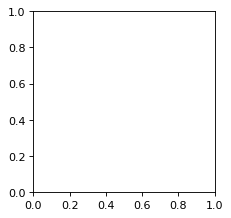

In [8]:
a = visualize_labeled_images(X, Y)
with tf.Session() as sess:
    print(sess.run(a))